<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clusterize-the-database-sequences" data-toc-modified-id="Clusterize-the-database-sequences-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clusterize the database sequences</a></span></li><li><span><a href="#Read" data-toc-modified-id="Read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read</a></span><ul class="toc-item"><li><span><a href="#download-results" data-toc-modified-id="download-results-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>download results</a></span></li></ul></li><li><span><a href="#Get-clusterized-sequences-and-taxa" data-toc-modified-id="Get-clusterized-sequences-and-taxa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get clusterized sequences and taxa</a></span></li></ul></div>

In [15]:
from qiime2 import Artifact

from os.path import join, dirname, exists, basename, splitext
import os
from glob import glob

import networkx as nx
import matplotlib.pyplot as plt

import pickle
import multiprocessing as mp

from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

import utils
import new_approach
import parse_cdhit

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
db_dir = 'created_db'
db_name = 'gsrv'
v_regions = ["V4", "V3-V4", "V1-V3", "V3-V5"]
identities = [0.99, 1]

In [17]:
# Outputs
env_files = {}
cdhit_out = {}
cdhit_out_ord = {}
db_out_prefix = {}


for v_region in v_regions:
    # database files
    env_files[v_region] = {
        'seq' : glob(
            join(db_dir, f"{db_name}_{v_region}*.fasta"))[0],
        'taxa': glob(
            join(db_dir, f"{db_name}_{v_region}*.txt"))[0]
    }
    
    # Outdir
    cluster_dir = f"Clustering/{v_region}"
    utils.check_dir(cluster_dir)
    
    # chdit out
    cdhit_out[v_region] = { identity: join(
        cluster_dir, 
        f"{db_name}_{v_region}_cluster-{identity}.clstr"
    ) for identity in identities}
    
    cdhit_out_ord[v_region] = { identity: join(
        cluster_dir, 
        f"{db_name}_{v_region}_cluster-{identity}_ord.clstr"
    ) for identity in identities}
    
    print(f"{env_files[v_region]=}")

env_files[v_region]={'seq': 'created_db/gsrv_V4_seqs.fasta', 'taxa': 'created_db/gsrv_V4_taxa.txt'}
env_files[v_region]={'seq': 'created_db/gsrv_V3-V4_seqs.fasta', 'taxa': 'created_db/gsrv_V3-V4_taxa.txt'}
env_files[v_region]={'seq': 'created_db/gsrv_V1-V3_seqs.fasta', 'taxa': 'created_db/gsrv_V1-V3_taxa.txt'}
env_files[v_region]={'seq': 'created_db/gsrv_V3-V5_seqs.fasta', 'taxa': 'created_db/gsrv_V3-V5_taxa.txt'}


## Clusterize the database sequences
Clusterize the database using cd-hit and sort the clusters by size

In [18]:
force = True

for v_region in v_regions:
    for identity in identities:
        # Outfiles
        cdhit_out_fasta = splitext(cdhit_out[v_region][identity])[0]
        
        if not exists(cdhit_out_fasta) or force:
            !time cd-hit-est -i {env_files[v_region]['seq']} -o {cdhit_out_fasta} -c {identity} -M 50000 -T 30 -g 1 -d 0
            !clstr_sort_by < {cdhit_out[v_region][identity]} no > {cdhit_out_ord[v_region][identity]}

Program: CD-HIT, V4.7 (+OpenMP), Jul 01 2017, 08:43:07
Command: cd-hit-est -i created_db/gsrv_V4_seqs.fasta -o
         Clustering/V4/gsrv_V4_cluster-0.99 -c 0.99 -M 50000 -T
         30 -g 1 -d 0

Started: Mon Jan 30 17:36:02 2023
                            Output                              
----------------------------------------------------------------
total seq: 48531
longest and shortest : 350 and 202
Total letters: 12296063
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 18M
Buffer          : 30 X 12M = 380M
Table           : 2 X 17M = 35M
Miscellaneous   : 4M
Total           : 439M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 6195090673

# comparing sequences from          0  to       1516
.---------- new table with     1475 representatives
# comparing sequences from       1516  to       2985
99.9%---------- new table with     1390 representatives
# comparing seque

----------     12 remaining sequences to the next cycle
---------- new table with      125 representatives
# comparing sequences from      39679  to      39955
----------     17 remaining sequences to the next cycle
---------- new table with      119 representatives
# comparing sequences from      39938  to      40206
..........    40000  finished      19286  clusters
----------     18 remaining sequences to the next cycle
---------- new table with      120 representatives
# comparing sequences from      40188  to      40448
----------     24 remaining sequences to the next cycle
---------- new table with      124 representatives
# comparing sequences from      40424  to      40677
99.9%---------- new table with      123 representatives
# comparing sequences from      40677  to      40922
----------     16 remaining sequences to the next cycle
---------- new table with      116 representatives
# comparing sequences from      40906  to      41144
100.0%---------- new table with      129

.....................---------- new table with      871 representatives

    48531  finished      23641  clusters

Apprixmated maximum memory consumption: 445M
writing new database
writing clustering information
program completed !

Total CPU time 116.25

real	0m5,277s
user	1m55,999s
sys	0m0,268s
Program: CD-HIT, V4.7 (+OpenMP), Jul 01 2017, 08:43:07
Command: cd-hit-est -i created_db/gsrv_V4_seqs.fasta -o
         Clustering/V4/gsrv_V4_cluster-1 -c 1 -M 50000 -T 30 -g
         1 -d 0

Started: Mon Jan 30 17:36:08 2023
                            Output                              
----------------------------------------------------------------
total seq: 48531
longest and shortest : 350 and 202
Total letters: 12296063
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 18M
Buffer          : 30 X 12M = 380M
Table           : 2 X 17M = 35M
Miscellaneous   : 4M
Total           : 439M

Table limit with the given memory limit:
Max number of representativ

99.9%---------- new table with      177 representatives
# comparing sequences from      42140  to      42339
----------      6 remaining sequences to the next cycle
---------- new table with      161 representatives
# comparing sequences from      42333  to      42526
----------     12 remaining sequences to the next cycle
---------- new table with      157 representatives
# comparing sequences from      42514  to      42702
----------      4 remaining sequences to the next cycle
---------- new table with      139 representatives
# comparing sequences from      42698  to      42880
100.0%---------- new table with      146 representatives
# comparing sequences from      42880  to      43056
99.9%---------- new table with      153 representatives
# comparing sequences from      43056  to      43227
99.9%---------- new table with      149 representatives
# comparing sequences from      43227  to      43392
100.0%---------- new table with      142 representatives
# comparing sequences from

total seq: 56616
longest and shortest : 500 and 400
Total letters: 23761006
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 30M
Buffer          : 30 X 12M = 384M
Table           : 2 X 17M = 35M
Miscellaneous   : 4M
Total           : 456M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 6192996044

# comparing sequences from          0  to       1769
.---------- new table with     1692 representatives
# comparing sequences from       1769  to       3482
100.0%---------- new table with     1384 representatives
# comparing sequences from       3482  to       5142
99.9%---------- new table with     1062 representatives
# comparing sequences from       5142  to       6750
----------     31 remaining sequences to the next cycle
---------- new table with      923 representatives
# comparing sequences from       6719  to       8278
99.9%---------- new table with      484 representatives


----------     95 remaining sequences to the next cycle
---------- new table with      110 representatives
# comparing sequences from      46293  to      46615
----------     80 remaining sequences to the next cycle
---------- new table with      135 representatives
# comparing sequences from      46535  to      46850
----------     19 remaining sequences to the next cycle
---------- new table with      211 representatives
# comparing sequences from      46831  to      47136
----------     74 remaining sequences to the next cycle
---------- new table with      102 representatives
# comparing sequences from      47062  to      47360
----------     51 remaining sequences to the next cycle
---------- new table with      147 representatives
# comparing sequences from      47309  to      47599
----------      2 remaining sequences to the next cycle
---------- new table with      197 representatives
# comparing sequences from      47597  to      47878
----------     53 remaining sequences to

.............---------- new table with       14 representatives
# comparing sequences from      55332  to      55372
99.9%---------- new table with       11 representatives
# comparing sequences from      55372  to      55410
99.9%---------- new table with       10 representatives
# comparing sequences from      55410  to      55447
100.0%---------- new table with       14 representatives
# comparing sequences from      55447  to      55483
99.9%---------- new table with       12 representatives
# comparing sequences from      55483  to      55518
100.0%---------- new table with       11 representatives
# comparing sequences from      55518  to      55552
100.0%---------- new table with       11 representatives
# comparing sequences from      55552  to      55585
99.9%---------- new table with        8 representatives
# comparing sequences from      55585  to      55617
99.9%---------- new table with       10 representatives
# comparing sequences from      55617  to      56616
........

100.0%---------- new table with      589 representatives
# comparing sequences from      37000  to      37613
99.9%---------- new table with      555 representatives
# comparing sequences from      37613  to      38206
100.0%---------- new table with      562 representatives
# comparing sequences from      38206  to      38781
100.0%---------- new table with      550 representatives
# comparing sequences from      38781  to      39338
100.0%---------- new table with      516 representatives
# comparing sequences from      39338  to      39877
99.9%---------- new table with      505 representatives
# comparing sequences from      39877  to      40400
..........    40000  finished      36568  clusters
99.9%---------- new table with      497 representatives
# comparing sequences from      40400  to      40906
100.0%---------- new table with      475 representatives
# comparing sequences from      40906  to      41396
----------     22 remaining sequences to the next cycle
---------- new t

100.0%---------- new table with       78 representatives
# comparing sequences from      53490  to      53587
100.0%---------- new table with       84 representatives
# comparing sequences from      53587  to      53681
100.0%---------- new table with       80 representatives
# comparing sequences from      53681  to      53772
100.0%---------- new table with       73 representatives
# comparing sequences from      53772  to      53860
.................---------- new table with       78 representatives
# comparing sequences from      53860  to      53946
..................---------- new table with       70 representatives
# comparing sequences from      53946  to      54029
.................---------- new table with       64 representatives
# comparing sequences from      54029  to      54109
99.9%---------- new table with       61 representatives
# comparing sequences from      54109  to      54187
99.9%---------- new table with       66 representatives
# comparing sequences from     

----------    200 remaining sequences to the next cycle
---------- new table with      320 representatives
# comparing sequences from       9667  to      10257
..........    10000  finished       4442  clusters
100.0%---------- new table with      104 representatives
# comparing sequences from      10257  to      10829
----------    207 remaining sequences to the next cycle
---------- new table with      105 representatives
# comparing sequences from      10622  to      11182
100.0%---------- new table with       37 representatives
# comparing sequences from      11182  to      11725
----------    169 remaining sequences to the next cycle
---------- new table with      155 representatives
# comparing sequences from      11556  to      12087
----------     62 remaining sequences to the next cycle
---------- new table with      246 representatives
# comparing sequences from      12025  to      12541
----------     82 remaining sequences to the next cycle
---------- new table with      23

# comparing sequences from      24131  to      24269
...................---------- new table with       80 representatives
# comparing sequences from      24269  to      24403
....................---------- new table with       91 representatives
# comparing sequences from      24403  to      24533
..................---------- new table with       69 representatives
# comparing sequences from      24533  to      24659
..................---------- new table with       77 representatives
# comparing sequences from      24659  to      24781
..................---------- new table with       81 representatives
# comparing sequences from      24781  to      24899
...................---------- new table with       61 representatives
# comparing sequences from      24899  to      25013
....................---------- new table with       70 representatives
# comparing sequences from      25013  to      25124
...................---------- new table with       71 representatives
# comparing seque

----------    157 remaining sequences to the next cycle
---------- new table with      513 representatives
# comparing sequences from       6465  to       7155
----------    248 remaining sequences to the next cycle
---------- new table with      397 representatives
# comparing sequences from       6907  to       7583
----------    276 remaining sequences to the next cycle
---------- new table with      375 representatives
# comparing sequences from       7307  to       7971
----------     49 remaining sequences to the next cycle
---------- new table with      589 representatives
# comparing sequences from       7922  to       8567
----------    106 remaining sequences to the next cycle
---------- new table with      510 representatives
# comparing sequences from       8461  to       9089
99.8%---------- new table with      608 representatives
# comparing sequences from       9089  to       9697
----------    143 remaining sequences to the next cycle
---------- new table with      454 

----------     15 remaining sequences to the next cycle
---------- new table with      118 representatives
# comparing sequences from      24105  to      24244
----------      4 remaining sequences to the next cycle
---------- new table with      118 representatives
# comparing sequences from      24240  to      24375
----------     30 remaining sequences to the next cycle
---------- new table with      100 representatives
# comparing sequences from      24345  to      24476
----------      9 remaining sequences to the next cycle
---------- new table with      120 representatives
# comparing sequences from      24467  to      24595
----------      2 remaining sequences to the next cycle
---------- new table with      119 representatives
# comparing sequences from      24593  to      24717
----------     18 remaining sequences to the next cycle
---------- new table with      100 representatives
# comparing sequences from      24699  to      24819
99.9%---------- new table with      119 

99.9%---------- new table with      390 representatives
# comparing sequences from      13868  to      15390
----------    445 remaining sequences to the next cycle
---------- new table with      473 representatives
# comparing sequences from      14945  to      16433
----------    313 remaining sequences to the next cycle
---------- new table with      546 representatives
# comparing sequences from      16120  to      17571
----------    434 remaining sequences to the next cycle
---------- new table with      534 representatives
# comparing sequences from      17137  to      18557
----------    153 remaining sequences to the next cycle
---------- new table with      674 representatives
# comparing sequences from      18404  to      19784
----------    300 remaining sequences to the next cycle
---------- new table with      546 representatives
# comparing sequences from      19484  to      20830
..........    20000  finished      10758  clusters
99.9%---------- new table with      242 

100.0%---------- new table with      278 representatives
# comparing sequences from      50744  to      51113
----------     64 remaining sequences to the next cycle
---------- new table with      211 representatives
# comparing sequences from      51049  to      51409
----------     18 remaining sequences to the next cycle
---------- new table with      220 representatives
# comparing sequences from      51391  to      51740
100.0%---------- new table with      157 representatives
# comparing sequences from      51740  to      52078
----------     27 remaining sequences to the next cycle
---------- new table with      221 representatives
# comparing sequences from      52051  to      52380
99.9%---------- new table with      210 representatives
# comparing sequences from      52380  to      52698
100.0%---------- new table with      171 representatives
# comparing sequences from      52698  to      53006
----------     64 remaining sequences to the next cycle
---------- new table with

...................---------- new table with       16 representatives
# comparing sequences from      61405  to      61441
..................---------- new table with       16 representatives
# comparing sequences from      61441  to      61476
.................---------- new table with       15 representatives
# comparing sequences from      61476  to      61510
.................---------- new table with       18 representatives
# comparing sequences from      61510  to      61543
.................---------- new table with       21 representatives
# comparing sequences from      61543  to      61575
................---------- new table with       18 representatives
# comparing sequences from      61575  to      61606
...............---------- new table with       14 representatives
# comparing sequences from      61606  to      62581
.....................---------- new table with      622 representatives

    62581  finished      30710  clusters

Apprixmated maximum memory consumption

# comparing sequences from      60095  to      60172
...................---------- new table with       75 representatives
# comparing sequences from      60172  to      60247
...................---------- new table with       67 representatives
# comparing sequences from      60247  to      60319
..................---------- new table with       61 representatives
# comparing sequences from      60319  to      60389
..................---------- new table with       63 representatives
# comparing sequences from      60389  to      60457
.................---------- new table with       61 representatives
# comparing sequences from      60457  to      60523
................---------- new table with       64 representatives
# comparing sequences from      60523  to      60587
................---------- new table with       63 representatives
# comparing sequences from      60587  to      60649
................---------- new table with       55 representatives
# comparing sequences from   

## Read

In [19]:
graphs = {}

# parse cd-hit cluster file
for v_region, d in cdhit_out_ord.items():
    graphs[v_region] = {}
    print(f"### {v_region} ###")
    for identity, path in d.items():
        db = basename(path)[:-10]
    #     db = basename(file_ord)
        
        # Create graph
        clusters = parse_cdhit.read_cluster(path)
        graphs[v_region][db] = parse_cdhit.create_graph(clusters)
        print(f"{db}: {nx.info(graphs[v_region][db])}")

### V4 ###


/tmp/ipykernel_33982/2173043270.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(f"{db}: {nx.info(graphs[v_region][db])}")


gsrv_V4_cluster-0.99: Graph with 48531 nodes and 24890 edges
gsrv_V4_cluster-1: Graph with 48531 nodes and 9730 edges
### V3-V4 ###
gsrv_V3-V4_cluster-0.99: Graph with 56616 nodes and 29613 edges
gsrv_V3-V4_cluster-1: Graph with 56616 nodes and 6600 edges
### V1-V3 ###
gsrv_V1-V3_cluster-0.99: Graph with 28566 nodes and 13902 edges
gsrv_V1-V3_cluster-1: Graph with 28566 nodes and 1692 edges
### V3-V5 ###
gsrv_V3-V5_cluster-0.99: Graph with 62581 nodes and 31871 edges
gsrv_V3-V5_cluster-1: Graph with 62581 nodes and 5975 edges


Comparing the same database with different identity, we can see that the number of nodes is constant whereas the number of edges is lower in 100% identity clusters.

In [20]:
taxon = ["family", "genus", "species"]

for v_region in v_regions:
    for db, g in graphs[v_region].items():

        # Obtain node attributes
        taxonomy, species, genus, family = parse_cdhit.cluster_attributes(
            env_files[v_region]['taxa'])

        # Add node attributes
        nx.set_node_attributes(g, taxonomy, 'taxonomy')
        nx.set_node_attributes(g, species, 'species')
        nx.set_node_attributes(g, genus, 'genus')
        nx.set_node_attributes(g, family, 'family')

#############################
#### V_Region : V4
#############################

#####
#### GRAPH : gsrv_V4_cluster-0.99
#####

Number of clusters = 23641
Number of cluster with 1 seq = 17840
Number of cluster with > 3 seqs = 2109

Length of the 0 component = 290

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 57, 60, 63, 65, 66, 67, 71, 74, 76, 80, 85, 88, 90, 95, 96, 103, 107, 108, 113, 121, 132, 135, 145, 167, 170, 180, 201, 208, 290}


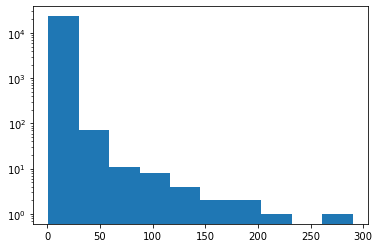

#####
#### GRAPH : gsrv_V4_cluster-1
#####

Number of clusters = 38801
Number of cluster with 1 seq = 34790
Number of cluster with > 3 seqs = 882

Length of the 0 component = 130

Sizes of the clusters:
{1, 130, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 44, 2, 57, 64, 65, 73, 75, 79, 81}


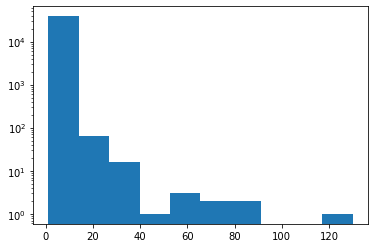

#############################
#### V_Region : V3-V4
#############################

#####
#### GRAPH : gsrv_V3-V4_cluster-0.99
#####

Number of clusters = 27003
Number of cluster with 1 seq = 20193
Number of cluster with > 3 seqs = 2528

Length of the 0 component = 436

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 54, 57, 59, 62, 63, 64, 66, 67, 68, 71, 85, 86, 94, 97, 107, 108, 110, 126, 141, 145, 179, 186, 211, 326, 373, 436}


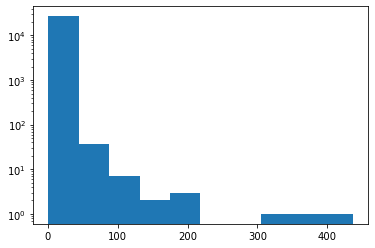

#####
#### GRAPH : gsrv_V3-V4_cluster-1
#####

Number of clusters = 50016
Number of cluster with 1 seq = 46337
Number of cluster with > 3 seqs = 466

Length of the 0 component = 110

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 30, 32, 33, 43, 55, 71, 75, 110}


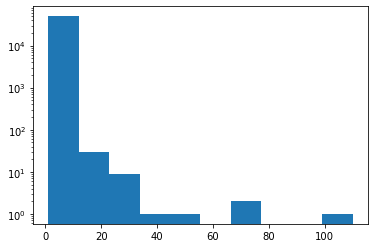

#############################
#### V_Region : V1-V3
#############################

#####
#### GRAPH : gsrv_V1-V3_cluster-0.99
#####

Number of clusters = 14664
Number of cluster with 1 seq = 10922
Number of cluster with > 3 seqs = 1235

Length of the 0 component = 262

Sizes of the clusters:
{1, 2, 3, 4, 5, 262, 7, 8, 9, 10, 11, 140, 13, 14, 15, 144, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 156, 29, 30, 31, 32, 33, 34, 35, 28, 37, 6, 39, 41, 42, 43, 45, 174, 46, 48, 49, 56, 57, 12, 62, 66, 72, 75, 77, 80, 16, 83, 103, 105, 118, 121}


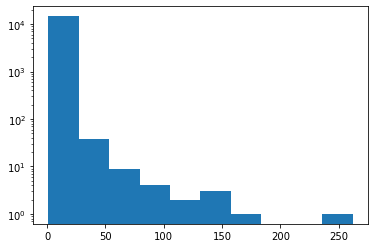

#####
#### GRAPH : gsrv_V1-V3_cluster-1
#####

Number of clusters = 26874
Number of cluster with 1 seq = 25566
Number of cluster with > 3 seqs = 80

Length of the 0 component = 15

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 15}


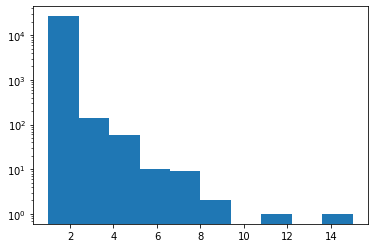

#############################
#### V_Region : V3-V5
#############################

#####
#### GRAPH : gsrv_V3-V5_cluster-0.99
#####

Number of clusters = 30710
Number of cluster with 1 seq = 23281
Number of cluster with > 3 seqs = 2760

Length of the 0 component = 322

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 67, 68, 69, 77, 82, 84, 85, 87, 93, 105, 106, 110, 117, 125, 139, 145, 148, 157, 158, 164, 217, 246, 262, 322}


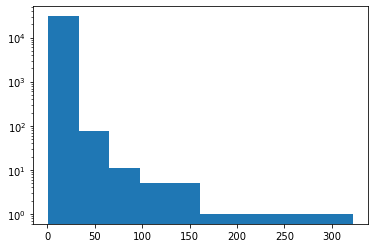

#####
#### GRAPH : gsrv_V3-V5_cluster-1
#####

Number of clusters = 56606
Number of cluster with 1 seq = 53011
Number of cluster with > 3 seqs = 380

Length of the 0 component = 97

Sizes of the clusters:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 22, 24, 25, 26, 30, 31, 32, 34, 40, 51, 64, 97}


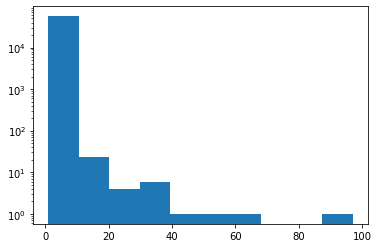

In [21]:
for v_region in v_regions:
    print(f"#############################\n#### V_Region : {v_region}\n#############################\n")
    for db, g in graphs[v_region].items():
        print(f"#####\n#### GRAPH : {db}\n#####\n")
        parse_cdhit.get_graph_information(g)

Above we can see that the cluster with 100% of identity have more clusters but with lower size, because it more difficult to group sequences in the same cluster.

### download results

In [22]:
%%time
taxon = ["family", "genus", "species"]
threads = 20
force = True

for v_region in v_regions:
    clusters_df_obj = join(
        f"Clustering/{v_region}", "clusters_df.pickle")

    if not exists(clusters_df_obj) or force:
        clusters_df = {}
        
        for key, g in graphs[v_region].items():
            df = parse_cdhit.results_to_df2(
                g, taxon, key, f"Clustering/{v_region}", 
                force=force, threads=threads)
            
            clusters_df[key] = df

        pickle.dump(clusters_df, open(clusters_df_obj, 'wb'))

CPU times: user 2min 42s, sys: 14.6 s, total: 2min 57s
Wall time: 3min 5s


## Get clusterized sequences and taxa

Centroid = first member of the cluster

If the cluster len = 1:
- Put the sequence and taxa of this centroid  

else:
- Put the sequence of the centroid (first element)
- Join the taxonomies

In [23]:
%%time
%autoreload
db_clu = {}
threads=25
force = True


for v_region in v_regions:
    db_clu[v_region] = {}
    db_clu_obj = join(
        f"Clustering/{v_region}", f"db_clu_dict_{v_region}.pickle")

    if not exists(db_clu_obj) or force:
        for db, g in graphs[v_region].items():
            ## In cluster with 100% identity keep only the centroid
            if '1' in db:
                only_centroid = True
            else:
                only_centroid = False

            args = [(g.subgraph(comp), only_centroid) for comp in list(nx.connected_components(g))]

            with mp.Pool(processes=threads) as pool:
                try:
                    results = pool.starmap(
                        parse_cdhit.get_taxa_from_cluster, args)
                except Exception as e:
                    pool.terminate()
                    raise e

            if only_centroid:
                db_clu[v_region][db] = {
                    item[0]:item[1] for item in results}
            else:
                db_clu[v_region][db] = {
                    i:tax.copy() for ids, tax in results for i in ids}

        pickle.dump(db_clu, open(db_clu_obj, 'wb'))
    else:
        db_clu = pickle.load(open(db_clu_obj, 'rb'))

CPU times: user 1min 38s, sys: 19.7 s, total: 1min 58s
Wall time: 2min 12s


At this point, we have decided to only work with clusters at 100% identity, because for V4 region we think that is a better approach.  

Add sequences and check if all the centroids from the fasta file are recorded.

In [24]:
# Append seqs
for v_region in v_regions:
    print(f"### {v_region}")
    for key, db in db_clu[v_region].items():
        # Choose cluster fasta
        if '1' in key:
            fasta_file = join(f"Clustering/{v_region}", key)
        # Choose original fasta
        else:
            fasta_file = env_files[v_region]['seq']

        print(f"{fasta_file} --> {key}")

        with open(fasta_file, "r") as seqsfile:
            for record in SeqIO.parse(seqsfile, "fasta"):
                ID = record.id
                seq= record.seq

                if ID in db:
                    db[ID]['seq'] = seq
                else:
                    print(f"{ID} not in {key} db")

### V4
created_db/gsrv_V4_seqs.fasta --> gsrv_V4_cluster-0.99
Clustering/V4/gsrv_V4_cluster-1 --> gsrv_V4_cluster-1
### V3-V4
created_db/gsrv_V3-V4_seqs.fasta --> gsrv_V3-V4_cluster-0.99
Clustering/V3-V4/gsrv_V3-V4_cluster-1 --> gsrv_V3-V4_cluster-1
### V1-V3
Clustering/V1-V3/gsrv_V1-V3_cluster-0.99 --> gsrv_V1-V3_cluster-0.99
Clustering/V1-V3/gsrv_V1-V3_cluster-1 --> gsrv_V1-V3_cluster-1
### V3-V5
created_db/gsrv_V3-V5_seqs.fasta --> gsrv_V3-V5_cluster-0.99
Clustering/V3-V5/gsrv_V3-V5_cluster-1 --> gsrv_V3-V5_cluster-1


Downloand clusters files

In [25]:
force = True
for v_region in v_regions:
    for key, db in db_clu[v_region].items():
        print(key)
        # Download as txt and fasta
        taxa_file = join(db_dir, f"{key}_taxa.txt")
        seqs_file = join(db_dir, f"{key}_seqs.fasta")
        

        if not exists(taxa_file) or not exists(seqs_file) or force:
            utils.download_db_from_dict(db, 
                                        taxa_out_file = taxa_file,
                                        seqs_out_file = seqs_file)
            utils.file_to_qza(taxa_file, input_type = 'taxa')
            utils.file_to_qza(seqs_file, input_type = 'seq')

gsrv_V4_cluster-0.99
gsrv_V4_cluster-1
gsrv_V3-V4_cluster-0.99
gsrv_V3-V4_cluster-1
gsrv_V1-V3_cluster-0.99
gsrv_V1-V3_cluster-1
gsrv_V3-V5_cluster-0.99
gsrv_V3-V5_cluster-1
